In [1]:
import pandas as pd 
import numpy as np


%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree


from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics

In [2]:
df = pd.read_csv('./CVD_datasets/heart_main.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [5]:
df =  df[df.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
df['Diabetic'] = df['Diabetic'].astype(int)

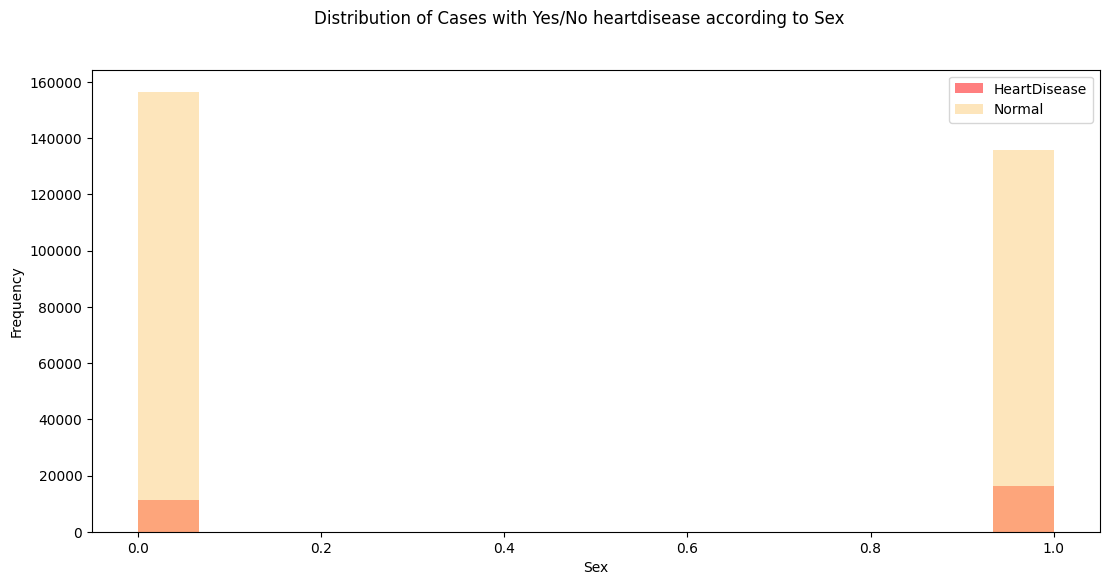

In [6]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["Sex"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["Sex"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heartdisease according to Sex")

ax.legend()

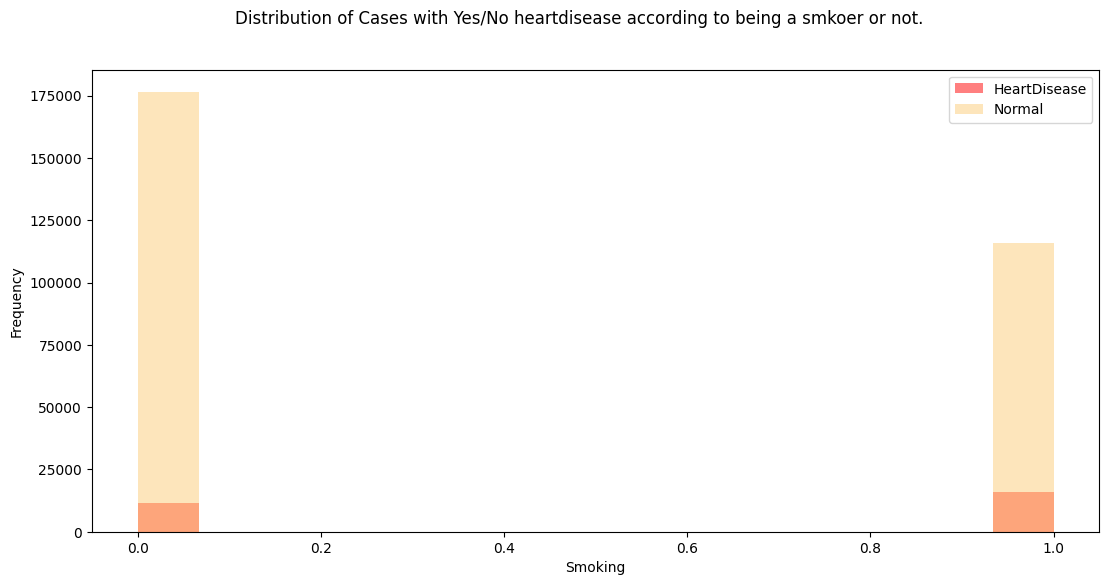

In [7]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["Smoking"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["Smoking"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heartdisease according to being a smkoer or not.")

ax.legend()

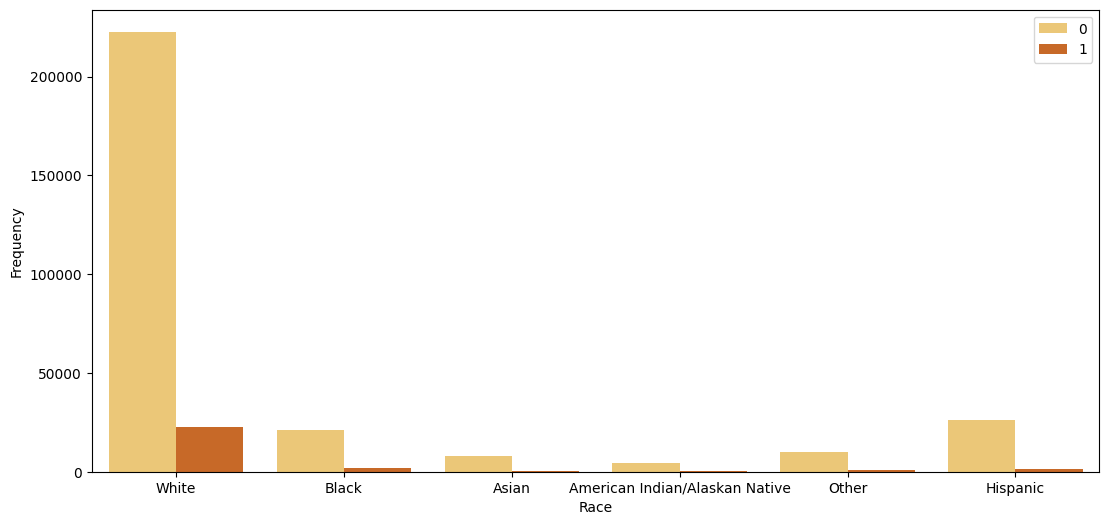

In [8]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['Race'], hue = 'HeartDisease', data = df, palette = 'YlOrBr')
plt.xlabel('Race')
plt.legend()
plt.ylabel('Frequency')
plt.show()

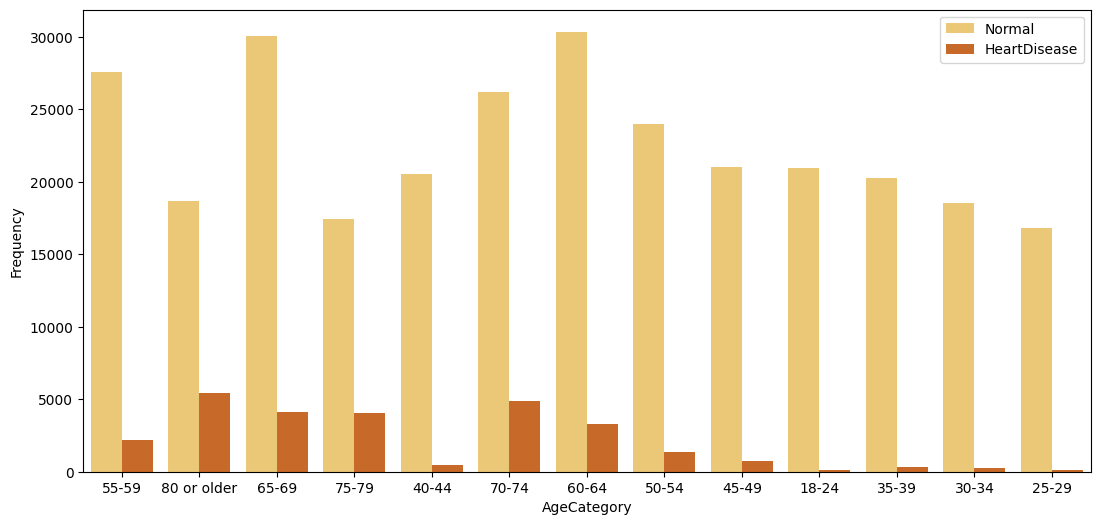

In [9]:
plt.figure(figsize = (13,6))
sns.countplot(x = df['AgeCategory'], hue = 'HeartDisease', data = df, palette = 'YlOrBr')
fig.suptitle("Distribution of Cases with Yes/No hartdisease according to AgeCategory")
plt.xlabel('AgeCategory')
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequency')
plt.show()

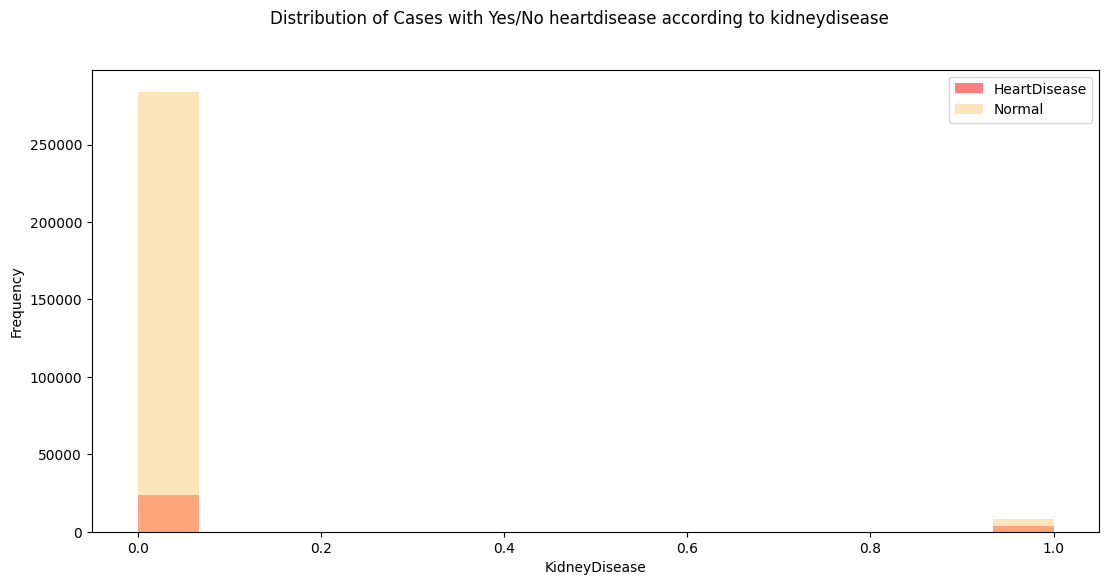

In [10]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["KidneyDisease"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["KidneyDisease"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("KidneyDisease")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heartdisease according to kidneydisease")

ax.legend()

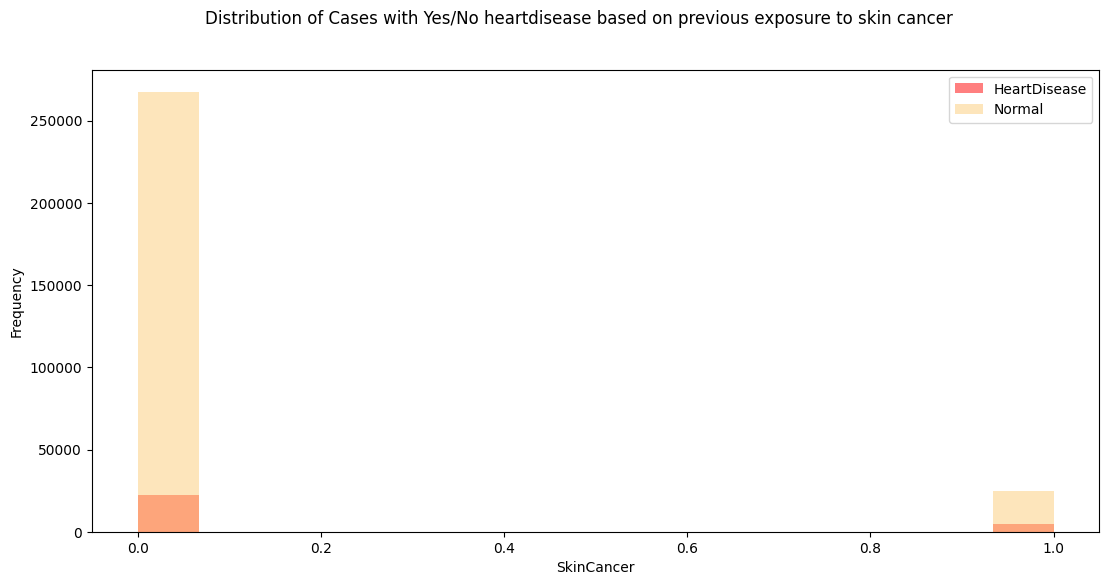

In [11]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["SkinCancer"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["SkinCancer"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("SkinCancer")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heartdisease based on previous exposure to skin cancer")

ax.legend()

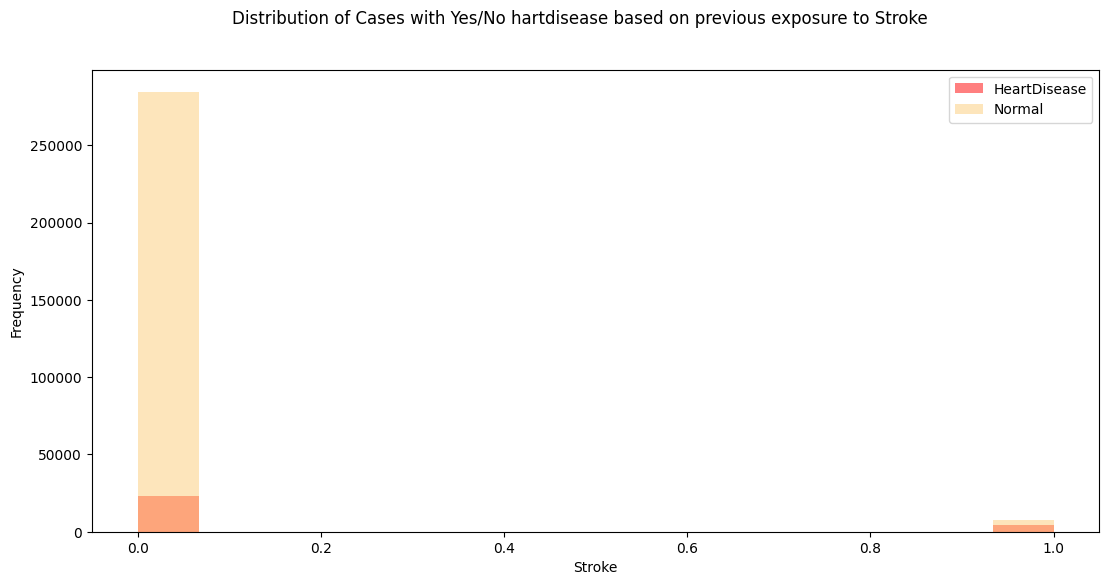

In [12]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["Stroke"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["Stroke"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Stroke")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No hartdisease based on previous exposure to Stroke")

ax.legend()

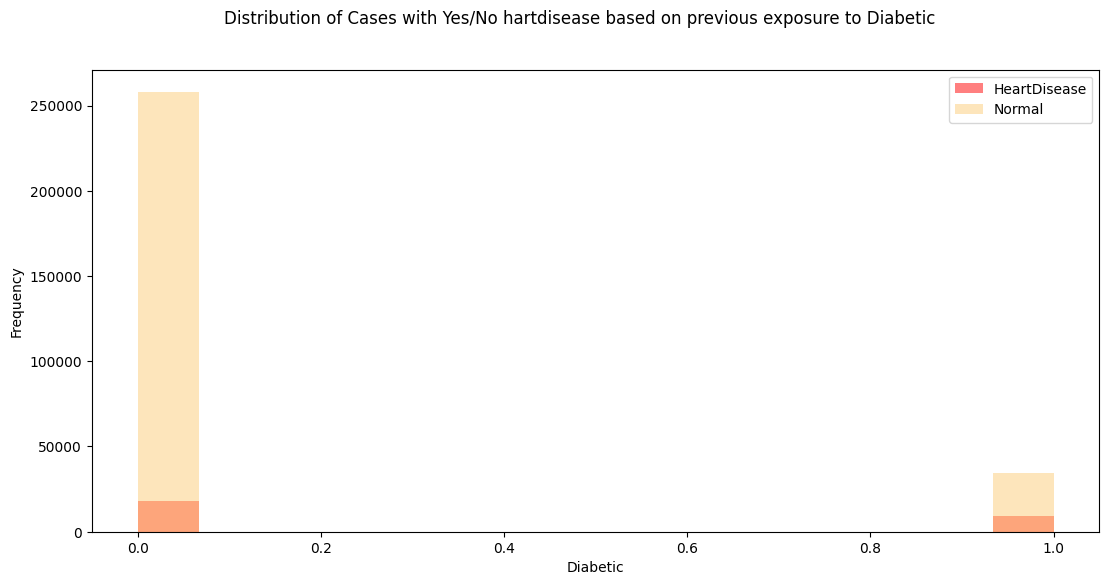

In [13]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["Diabetic"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["Diabetic"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Diabetic")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No hartdisease based on previous exposure to Diabetic")

ax.legend()

<Axes: >

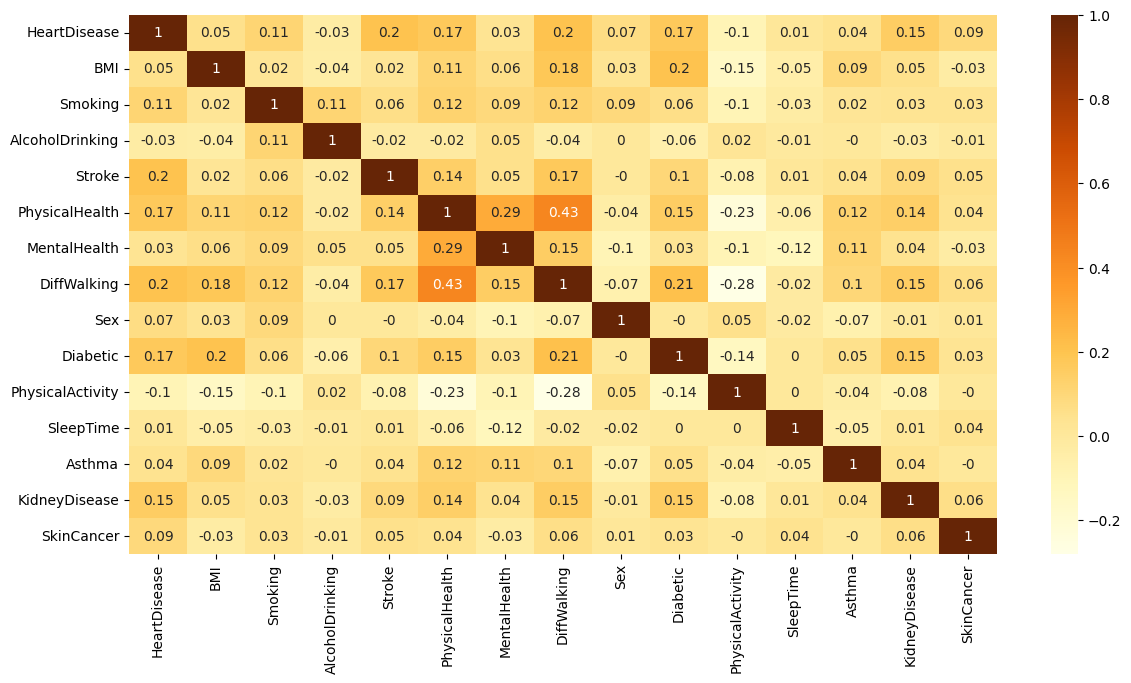

In [14]:
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

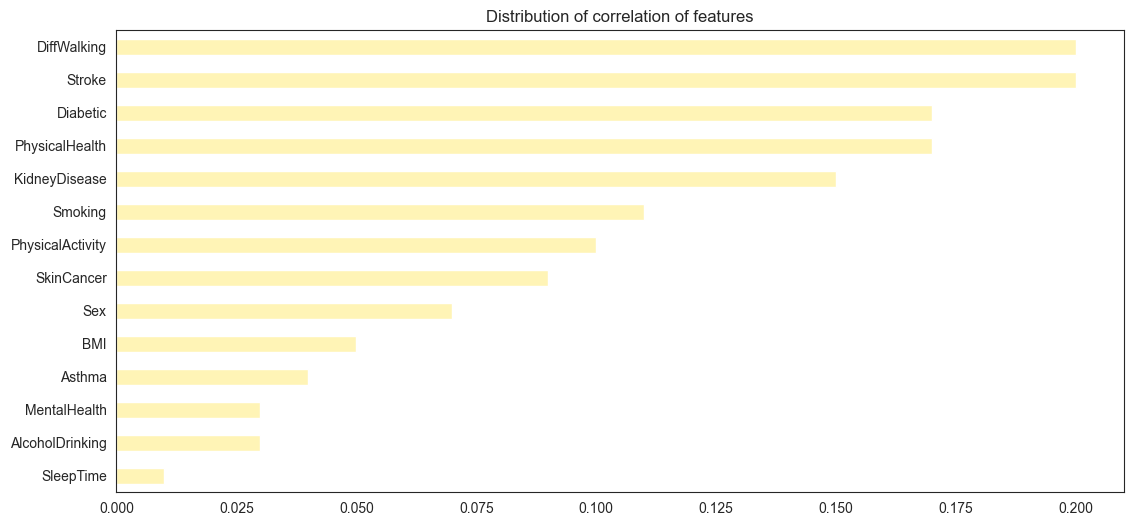

In [15]:
sns.set_style('white')
sns.set_palette('YlOrBr')
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features')
abs(correlation['HeartDisease']).sort_values()[:-1].plot.barh()
plt.show()

/var/folders/4n/v3h56rkn1_5_kj0gsbwr0tsh0000gn/T/ipykernel_19642/254332702.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==1]["BMI"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
/var/folders/4n/v3h56rkn1_5_kj0gsbwr0tsh0000gn/T/ipykernel_19642/254332702.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==0]["BMI"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)


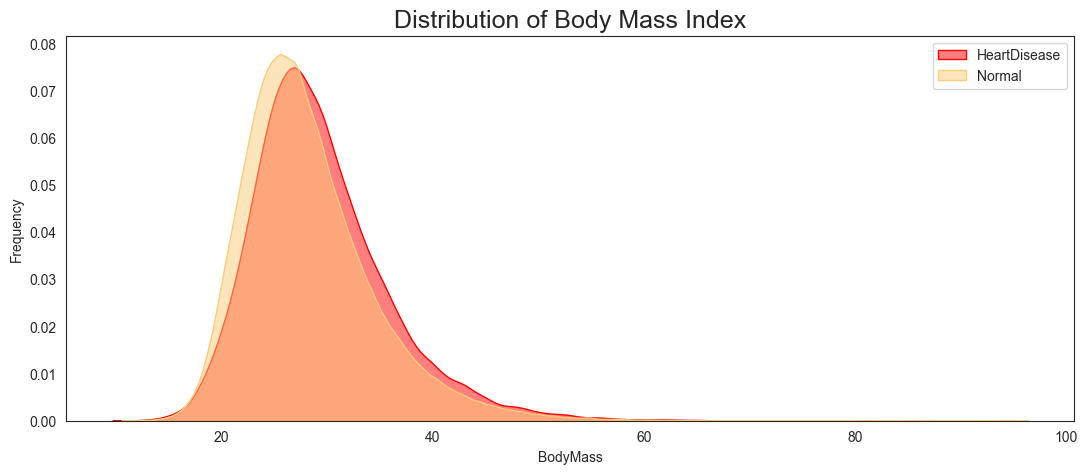

In [16]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["BMI"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["BMI"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Body Mass Index', fontsize = 18)
ax.set_xlabel("BodyMass")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()


/var/folders/4n/v3h56rkn1_5_kj0gsbwr0tsh0000gn/T/ipykernel_19642/2242597631.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==1]["SleepTime"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
/var/folders/4n/v3h56rkn1_5_kj0gsbwr0tsh0000gn/T/ipykernel_19642/2242597631.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==0]["SleepTime"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)


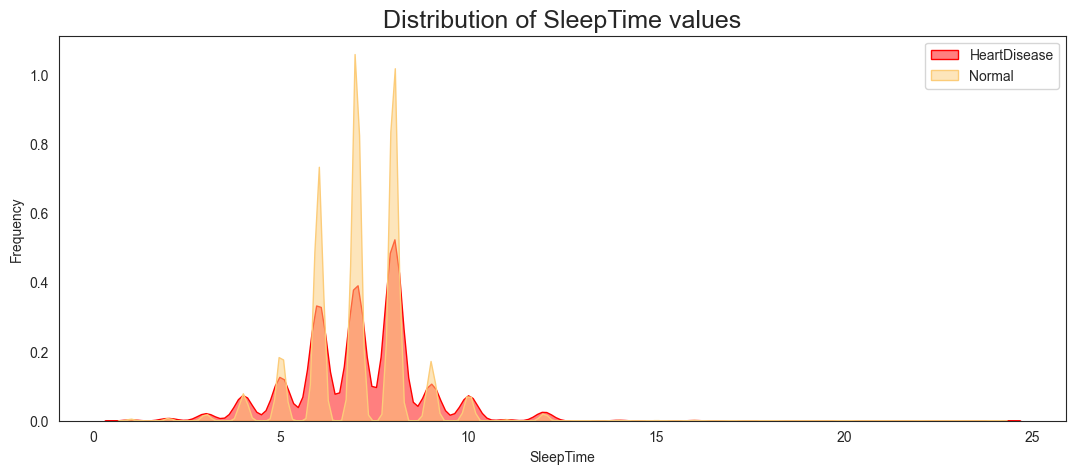

In [17]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["SleepTime"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["SleepTime"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of SleepTime values', fontsize = 18)
ax.set_xlabel("SleepTime")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

/var/folders/4n/v3h56rkn1_5_kj0gsbwr0tsh0000gn/T/ipykernel_19642/1514741577.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==1]["PhysicalHealth"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
/var/folders/4n/v3h56rkn1_5_kj0gsbwr0tsh0000gn/T/ipykernel_19642/1514741577.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==0]["PhysicalHealth"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)


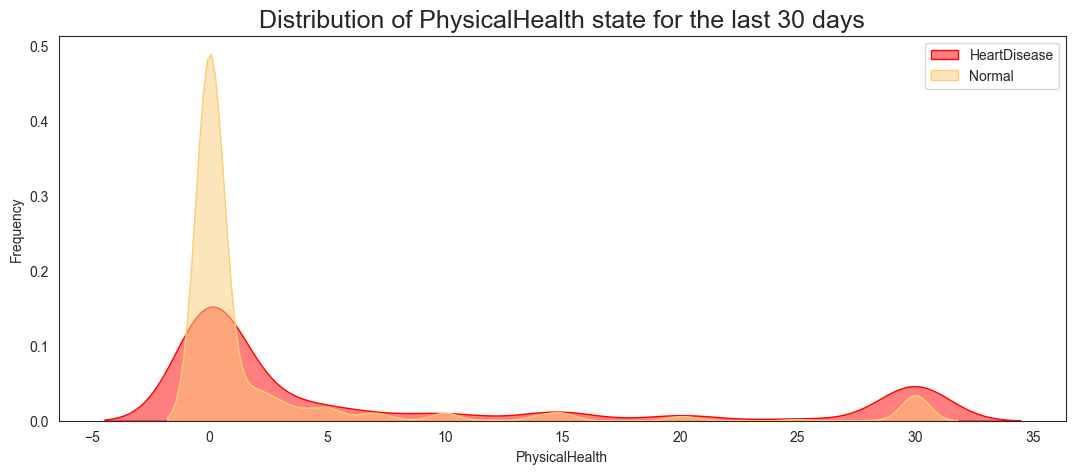

In [18]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["PhysicalHealth"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["PhysicalHealth"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of PhysicalHealth state for the last 30 days', fontsize = 18) # Read the introduction to know what the scale of numerical features mean
ax.set_xlabel("PhysicalHealth")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

/var/folders/4n/v3h56rkn1_5_kj0gsbwr0tsh0000gn/T/ipykernel_19642/3430554068.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==1]["MentalHealth"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
/var/folders/4n/v3h56rkn1_5_kj0gsbwr0tsh0000gn/T/ipykernel_19642/3430554068.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"]==0]["MentalHealth"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)


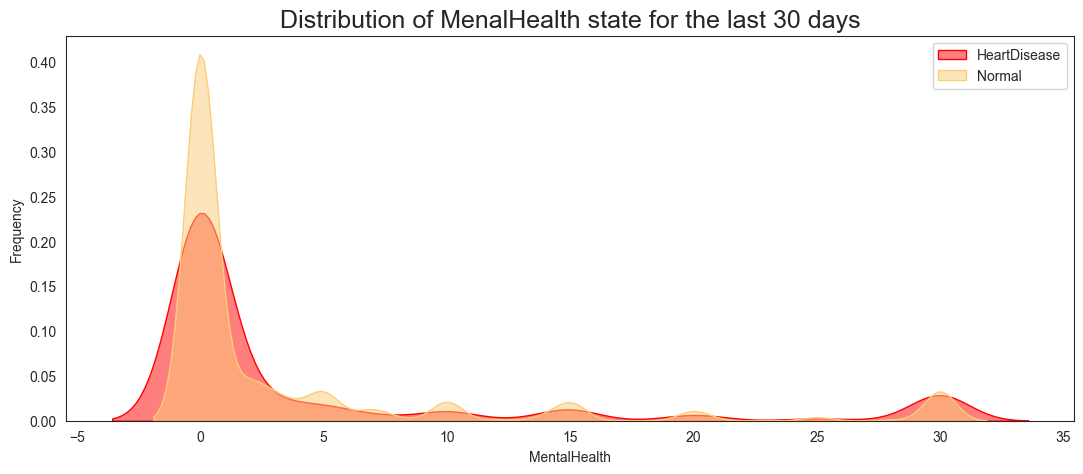

In [19]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["MentalHealth"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["MentalHealth"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of MenalHealth state for the last 30 days', fontsize = 18)
ax.set_xlabel("MentalHealth")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

In [20]:
#Select Features
features = df.drop(columns =['HeartDisease'], axis = 1)

#Select Target 
target = df['HeartDisease']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (255836, 17)
Shape of testing feature: (63959, 17)
Shape of training label: (255836,)
Shape of training label: (63959,)


In [21]:
transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), ['AgeCategory', 'Race', 'GenHealth']),
    remainder='passthrough')

# Encode training data 
transformed_train = transformer.fit_transform(X_train)
transformed_train_data = pd.DataFrame(transformed_train, columns=transformer.get_feature_names_out())

# Concat the two tables
transformed_train_data.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)
X_train = pd.concat([transformed_train_data, X_train], axis=1)

# Remove old columns
X_train.drop(['AgeCategory', 'Race', 'GenHealth'], axis = 1, inplace = True)

# Encode test data 
transformed_test = transformer.transform(X_test)  # Notice the change here
transformed_test_data = pd.DataFrame(transformed_test, columns=transformer.get_feature_names_out())

# Concat the two tables
transformed_test_data.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_test = pd.concat([transformed_test_data, X_test], axis=1)

# Remove old columns
X_test.drop(['AgeCategory', 'Race', 'GenHealth'], axis = 1, inplace = True)

/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [22]:


scaler = StandardScaler()

# Scale trainint data
X_train = scaler.fit_transform(X_train)

# Scale test data
X_test = scaler.fit_transform(X_test)



In [23]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [24]:


X_train



array([[-0.26549634, -0.23664263, -0.25032481, ..., -0.39281938,
        -0.19512091, -0.32147374],
       [-0.26549634, -0.23664263, -0.25032481, ..., -0.39281938,
        -0.19512091, -0.32147374],
       [-0.26549634, -0.23664263, -0.25032481, ..., -0.39281938,
        -0.19512091, -0.32147374],
       ...,
       [-0.26549634, -0.23664263, -0.25032481, ..., -0.39281938,
        -0.19512091, -0.32147374],
       [-0.26549634, -0.23664263, -0.25032481, ...,  2.54569927,
        -0.19512091, -0.32147374],
       [-0.26549634,  4.22578124, -0.25032481, ..., -0.39281938,
        -0.19512091, -0.32147374]])

In [25]:
# Building a model using KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)


# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.9050016416766992
Precision: 0.3570780399274047
Recall: 0.14450973191333089
F1 Score: 0.2057516339869281
Cohens Kappa Score: 0.16477268538693723
Area Under Curve: 0.7190876830488478
Confusion Matrix:
 [[57096  1417]
 [ 4659   787]]


In [31]:
# Re-importing the dataset to start fresh
df = pd.read_csv('./CVD_datasets/heart_main.csv')

# Checking for missing values in the dataset
missing_values_in_dataset = df.isnull().sum().sum()

# Encode the target variable
y = df['HeartDisease'].map({'Yes': 1, 'No': 0})

# Now, let's manually encode the categorical variables using pd.get_dummies
# and scale the numerical features using StandardScaler.
X = df.drop('HeartDisease', axis=1)
X_encoded = pd.get_dummies(X, columns=categorical_columns)
scaler = StandardScaler()
X_encoded[numerical_columns] = scaler.fit_transform(X_encoded[numerical_columns])

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Retrain the KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Function to predict heart disease with manual preprocessing
def predict_heart_disease_manual(user_input):
    user_input_df = pd.DataFrame([user_input])
    user_input_encoded = pd.get_dummies(user_input_df, columns=categorical_columns)
    user_input_encoded = user_input_encoded.reindex(columns=X_train.columns, fill_value=0)
    user_input_encoded[numerical_columns] = scaler.transform(user_input_encoded[numerical_columns])
    probability = knn_model.predict_proba(user_input_encoded)[0, 1]
    return probability

# Checking for missing values and retraining the model
missing_values_in_dataset


0

In [44]:
user_data = {
    'BMI': 25.5,
    'Smoking': 'Yes',
    'AlcoholDrinking': 'Yes',
    'Stroke': 'No',
    'PhysicalHealth': 1.0,
    'MentalHealth': 1.0,
    'DiffWalking': 'No',
    'Sex': 'Male',
    'AgeCategory': '80 or older',
    'Race': 'White',
    'Diabetic': 'Yes',
    'PhysicalActivity': 'Yes',
    'GenHealth': 'Poor',
    'SleepTime': 7.0,
    'Asthma': 'No',
    'KidneyDisease': 'No',
    'SkinCancer': 'No'
}

# Using the updated prediction function with the example user data
probability_manual = predict_heart_disease_manual(user_data)
probability_percentage_manual = probability_manual * 100  # Convert to percentage
probability_percentage_manual


20.0

/var/folders/4n/v3h56rkn1_5_kj0gsbwr0tsh0000gn/T/ipykernel_19642/2745569176.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"] == 'Yes'][feature], alpha=0.5, shade=True, color="red", label="HeartDisease", ax=ax)
/var/folders/4n/v3h56rkn1_5_kj0gsbwr0tsh0000gn/T/ipykernel_19642/2745569176.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"] == 'No'][feature], alpha=0.5, shade=True, color="#fccc79", label="Normal", ax=ax)


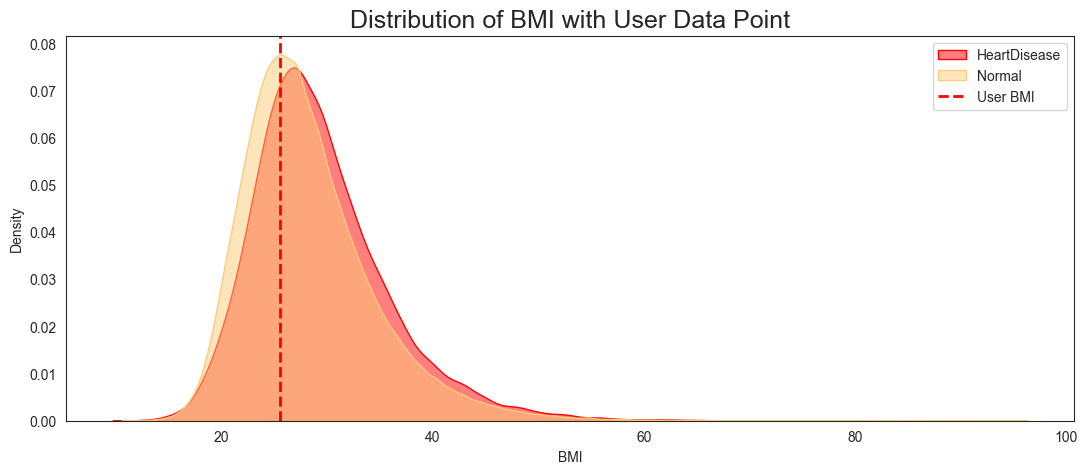

/var/folders/4n/v3h56rkn1_5_kj0gsbwr0tsh0000gn/T/ipykernel_19642/2745569176.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"] == 'Yes'][feature], alpha=0.5, shade=True, color="red", label="HeartDisease", ax=ax)
/var/folders/4n/v3h56rkn1_5_kj0gsbwr0tsh0000gn/T/ipykernel_19642/2745569176.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"] == 'No'][feature], alpha=0.5, shade=True, color="#fccc79", label="Normal", ax=ax)


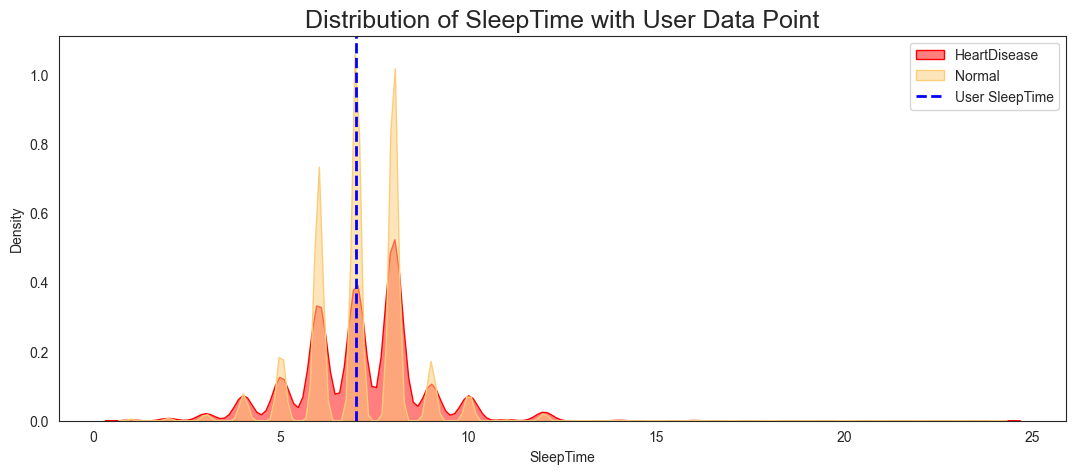

/var/folders/4n/v3h56rkn1_5_kj0gsbwr0tsh0000gn/T/ipykernel_19642/2745569176.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"] == 'Yes'][feature], alpha=0.5, shade=True, color="red", label="HeartDisease", ax=ax)
/var/folders/4n/v3h56rkn1_5_kj0gsbwr0tsh0000gn/T/ipykernel_19642/2745569176.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"] == 'No'][feature], alpha=0.5, shade=True, color="#fccc79", label="Normal", ax=ax)


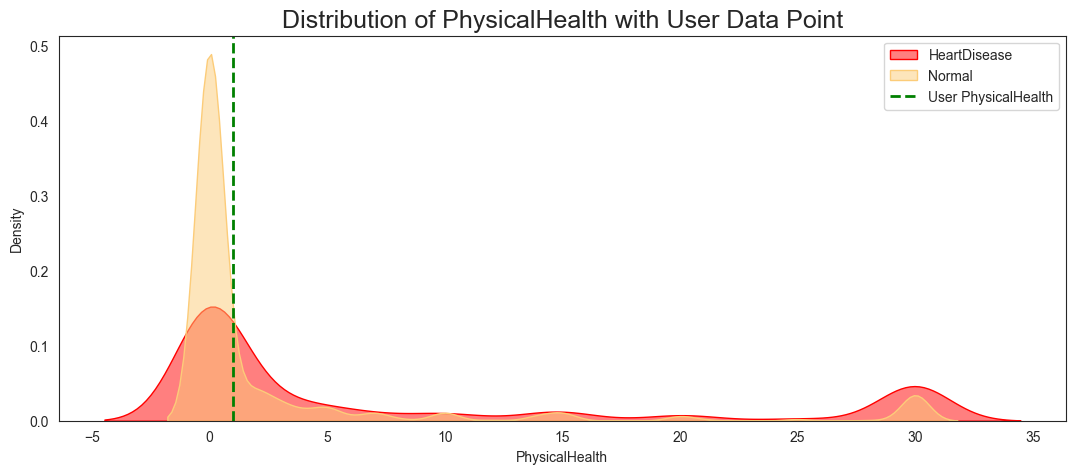

/var/folders/4n/v3h56rkn1_5_kj0gsbwr0tsh0000gn/T/ipykernel_19642/2745569176.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"] == 'Yes'][feature], alpha=0.5, shade=True, color="red", label="HeartDisease", ax=ax)
/var/folders/4n/v3h56rkn1_5_kj0gsbwr0tsh0000gn/T/ipykernel_19642/2745569176.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["HeartDisease"] == 'No'][feature], alpha=0.5, shade=True, color="#fccc79", label="Normal", ax=ax)


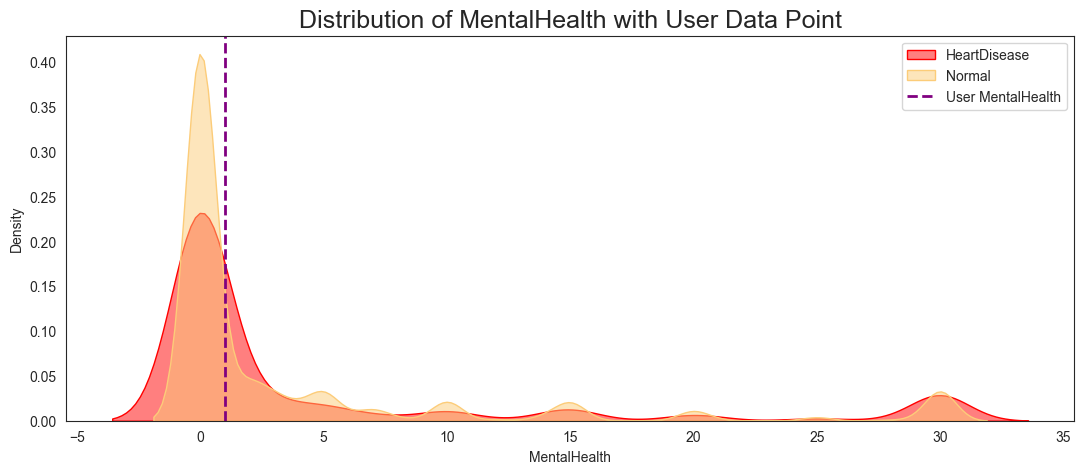

In [47]:
# Creating a function to plot distribution for different features including the user data point
def plot_feature_distribution(feature, user_value, color, label):
    fig, ax = plt.subplots(figsize=(13, 5))
    sns.kdeplot(df[df["HeartDisease"] == 'Yes'][feature], alpha=0.5, shade=True, color="red", label="HeartDisease", ax=ax)
    sns.kdeplot(df[df["HeartDisease"] == 'No'][feature], alpha=0.5, shade=True, color="#fccc79", label="Normal", ax=ax)
    plt.axvline(user_value, color=color, linestyle='dashed', linewidth=2, label=label)
    plt.title(f'Distribution of {feature} with User Data Point', fontsize=18)
    ax.set_xlabel(feature)
    ax.set_ylabel("Density")
    ax.legend()
    plt.show()

# Plotting for SleepTime, PhysicalHealth, and MentalHealth including user data points
plot_feature_distribution('BMI', user_data['BMI'], 'red', 'User BMI')
plot_feature_distribution('SleepTime', user_data['SleepTime'], 'blue', 'User SleepTime')
plot_feature_distribution('PhysicalHealth', user_data['PhysicalHealth'], 'green', 'User PhysicalHealth')
plot_feature_distribution('MentalHealth', user_data['MentalHealth'], 'purple', 'User MentalHealth')
